<a href="https://colab.research.google.com/github/ffclemente/Projeto-Pesquisas-CITs-2021-22/blob/main/PROJETO_PESQUISAS_CITS_2021_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# PROJETO DE ANÁLISE DOS DADOS DAS PESQUISAS APLICADAS COM TURISTAS NAS CENTRAIS DE INFORMAÇÃO TURÍSTICA DA CIDADE DE SÃO PAULO (CITS) ENTRE 2021 E 2022.
# Resultado do Trabalho de Conclusão de Curso em MBA em Data Science Analytics (ESALQ/USP, 2023).
# Título do trabalho: A Satifação dos visitantes das Centrais de Informação Turística da cidade de São Paulo: uma análise das pesquisas aplicadas entre 2021 e 2022.
# Autor: Fernando Fernandes Clemente
# Fonte dos dados: VMO TURISMO empresa terceirizada/ SECRETARIA MUNICIPAL DE TURISMO / PREFEITURA DE SÃO PAULO, 2023.

# Link base de dados 1 - PESQUISAS - Github?

# Carregar arquivo
from google.colab import files
uploaded = files.upload()

Saving PROJETO PESQUISAS CITS 2021-22 (NOVO).xlsx to PROJETO PESQUISAS CITS 2021-22 (NOVO) (3).xlsx


In [ ]:
# Carregar pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

caminho_local = 'PROJETO PESQUISAS CITS 2021-22 (NOVO) (3).xlsx'

# Carregar o arquivo Excel
dados = pd.read_excel(caminho_local)

# Exibir as primeiras 30 linhas
dados.head(5)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Carimbo de data/hora,CIT,Data,1. Data de chegada à São Paulo - Fecha de llegada - arrival date,2. Data de saída de São Paulo - Fechada de salida - departure date,3. País de Residência/Pais de residencia/ Country of residence,4. Estado de Residência/Provincia de Residencia/State of residence,5. Cidade de Residência/ciudad de residencia/city of residence,6. Gênero/Género/Gender,4. Estado de residência,5. Cidade de residência,6. Gênero,7. Meio de transporte utilizado para chegar à cidade/Transporte utilizado para llegar en SP/ Transportacion used to get to SP,8. Motivo predominante de sua viagem/Motivo predominante de su viaje/ Main reason of your trip,9. Que outras atividades realizou ou pretende realizar na cidade/ Actividades ha realizado o pretende realizar en la ciudad/ Which activities have you done or intend to do in the city,"10. Gasto individual total em sua permanência em São Paulo (incluindo hospedagem, transporte e alimentação)/ Gasto individual total durante su permanencia en São Paulo/ Total individual expenses during your stay in São Paulo","11. Qual a moeda do valor informado acima/Por favor, informe la moneda utilizada para informar el valor arriba/Please, inform the currency used above:",12. Está viajando com quem/¿ Con quién viaja?/Who are you travelling with?,13. Onde está hospedado/¿Dónde está alojado?/ Where are you staying?,14. Quais atrativos turísticos lhe interessaram na cidade/¿ Cuáles atractivos turísticos de la ciudad le interesa conocer?/What attractions are you interested in the city? [Teatros],14. Quais atrativos turísticos lhe interessaram na cidade/¿ Cuáles atractivos turísticos de la ciudad le interesa conocer?/What attractions are you interested in the city? [Restaurantes],14. Quais atrativos turísticos lhe interessaram na cidade/¿ Cuáles atractivos turísticos de la ciudad le interesa conocer?/What attractions are you interested in the city? [Compras],14. Quais atrativos turísticos lhe interessaram na cidade/¿ Cuáles atractivos turísticos de la ciudad le interesa conocer?/What attractions are you interested in the city? [Museus],14. Quais atrativos turísticos lhe interessaram na cidade/¿ Cuáles atractivos turísticos de la ciudad le interesa conocer?/What attractions are you interested in the city? [D.O.M restaurante],14. Quais atrativos turísticos lhe interessaram na cidade/¿ Cuáles atractivos turísticos de la ciudad le interesa conocer?/What attractions are you interested in the city? [Shows],14. Quais atrativos turísticos lhe interessaram na cidade/¿ Cuáles atractivos turísticos de la ciudad le interesa conocer?/What attractions are you interested in the city? [SESC Ipiranga],14. Quais atrativos turísticos lhe interessaram na cidade/¿ Cuáles atractivos turísticos de la ciudad le interesa conocer?/What attractions are you interested in the city? [SESC Consolação],14. Quais atrativos turísticos lhe interessaram na cidade/¿ Cuáles atractivos turísticos de la ciudad le interesa conocer?/What attractions are you interested in the city? [SESC],14. Quais atrativos turísticos lhe interessaram na cidade/¿ Cuáles atractivos turísticos de la ciudad le interesa conocer?/What attractions are you interested in the city? [Teatro Parlapatões],14. Quais atrativos turísticos lhe interessaram na cidade/¿ Cuáles atractivos turísticos de la ciudad le interesa conocer?/What attractions are you interested in the city? [Vila Madalena],14. Quais atrativos turísticos lhe interessaram na cidade/¿ Cuáles atractivos turísticos de la ciudad le interesa conocer?/What attractions are you interested in the city? [MASP],14. Quais atrativos turísticos lhe interessaram na cidade/¿ Cuáles atractivos turísticos de la ciudad le interesa conocer?/What attractions are you interested in the city? [Avenida Paulista],14. Quais atrativos turísticos lhe interessaram na cidade/¿ Cuáles atractivos turísticos de la ciudad le interesa conocer?/What attractions are you interested in the city? [Parques],14. Quais atrativos turísticos lhe inte

Tabela de Frequências:
             CIT  Frequência  Frequência Relativa (%)  Frequência Cumulativa
0  CIT Congonhas        1228                25.143325                   1228
1  CIT Guarulhos         988                20.229320                   2216
4   CIT Paulista         871                17.833743                   3087
2  CIT República         922                18.877969                   4009
3      CIT Tietê         874                17.895168                   4883

Estatísticas:
count              4883
unique                5
top       CIT Congonhas
freq               1228
Name: CIT, dtype: object


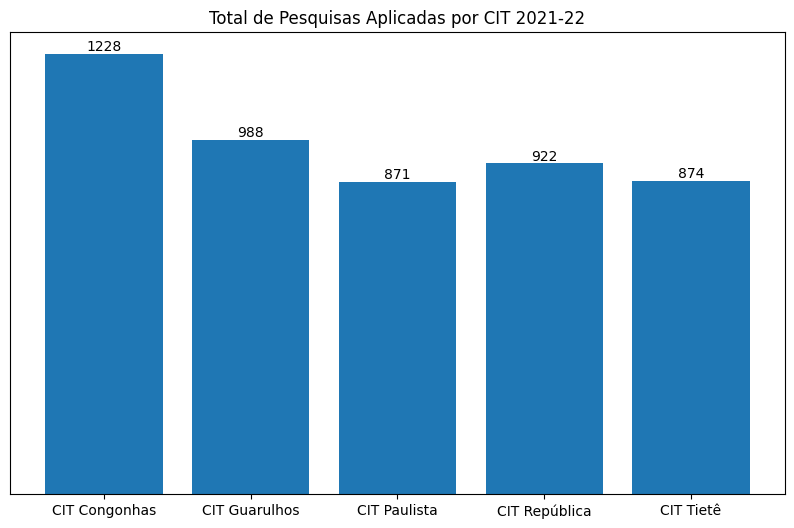

In [ ]:
# TABELA DE FREQUÊNCIAS E GRÁFICO DE BARRAS DO TOTAL DE PESQUISAS APLICADAS POR CIT ENTRE 2021 E 2022

# Tabela de Frequências variável CIT
tabela_frequencias = dados['CIT'].value_counts().reset_index()
tabela_frequencias.columns = ['CIT', 'Frequência']

# Frequências Relativas em porcentagem
total_registros = len(dados)
tabela_frequencias['Frequência Relativa (%)'] = (tabela_frequencias['Frequência'] / total_registros) * 100

# Frequências Cumulativas
tabela_frequencias = tabela_frequencias.sort_values(by='CIT')
tabela_frequencias['Frequência Cumulativa'] = tabela_frequencias['Frequência'].cumsum()

# Estatísticas adicionais
estatisticas = dados['CIT'].describe()

# Exibir tabelas
print("Tabela de Frequências:")
print(tabela_frequencias)

print("\nEstatísticas:")
print(estatisticas)

# Gráfico de barras para a tabela de frequências
plt.figure(figsize=(10, 6))
bars = plt.bar(tabela_frequencias['CIT'], tabela_frequencias['Frequência'])

# Adiciona os valores nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Remove as legendas dos eixos x e y
plt.xticks(ticks=tabela_frequencias['CIT'], labels=tabela_frequencias['CIT'])
plt.yticks([])

plt.title('Total de Pesquisas Aplicadas por CIT 2021-22')
plt.show()


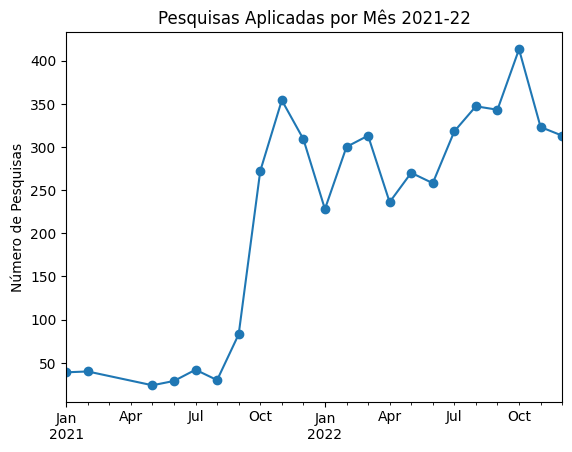

In [ ]:
# GRÁFICO DE LINHA DO TOTAL DE PESQUISAS APLICADAS POR MÊS

# Converta a coluna 'Carimbo de data/hora' para o formato datetime
dados['Carimbo de data/hora'] = pd.to_datetime(dados['Carimbo de data/hora'])

# Crie uma coluna de Mês
dados['Mes'] = dados['Carimbo de data/hora'].dt.to_period('M')

# Conte o número de ocorrências para cada mês
contagem_por_mes = dados['Mes'].value_counts().sort_index()

# Crie o gráfico de linha
contagem_por_mes.plot(kind='line', marker='o')

# Adicione rótulos e título ao gráfico
plt.xlabel('')
plt.ylabel('Número de Pesquisas')
plt.title('Pesquisas Aplicadas por Mês 2021-22')

# Exiba o gráfico
plt.show()

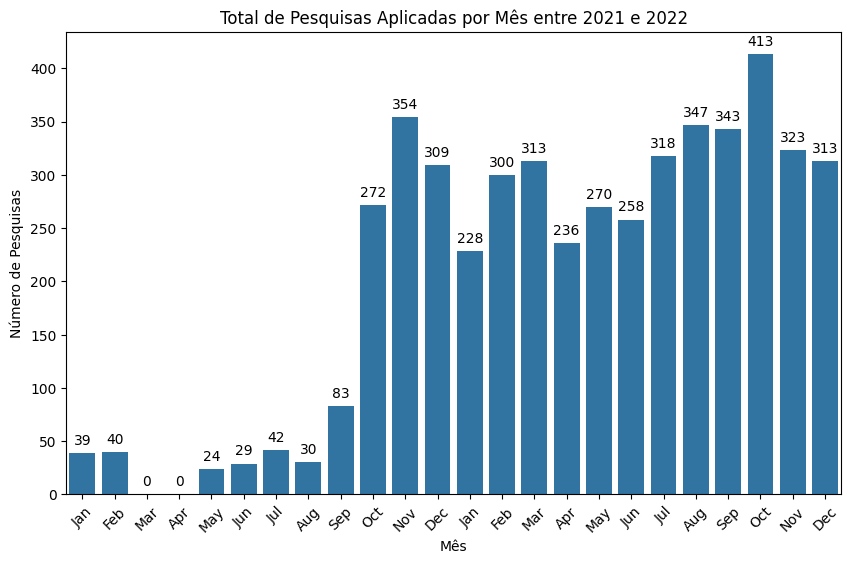

In [ ]:
# GRÁFICO DE BARRAS DO TOTAL DE PESQUISAS APLICADAS POR MÊS

# Converta a coluna 'Carimbo de data/hora' para o formato datetime
dados['Carimbo de data/hora'] = pd.to_datetime(dados['Carimbo de data/hora'])

# Crie uma coluna de Mês
dados['Mes'] = dados['Carimbo de data/hora'].dt.to_period('M')

# Conte o número de ocorrências para cada mês, incluindo todos os meses possíveis
contagem_por_mes = dados['Mes'].value_counts().sort_index().reindex(pd.period_range(dados['Mes'].min(), dados['Mes'].max(), freq='M'), fill_value=0)

# Crie o gráfico de barras com os valores totais
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=contagem_por_mes.index.astype(str), y=contagem_por_mes.values)

# Adicione os valores totais no topo das barras
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')

# Ajuste as legendas para mostrar apenas os nomes dos meses
plt.xticks(range(len(contagem_por_mes.index)), contagem_por_mes.index.strftime('%b'), rotation=45)

# Adicione rótulos e título ao gráfico
plt.xlabel('Mês')
plt.ylabel('Número de Pesquisas')
plt.title('Total de Pesquisas Aplicadas por Mês entre 2021 e 2022')

# Exiba o gráfico
plt.show()



<Figure size 1200x600 with 0 Axes>

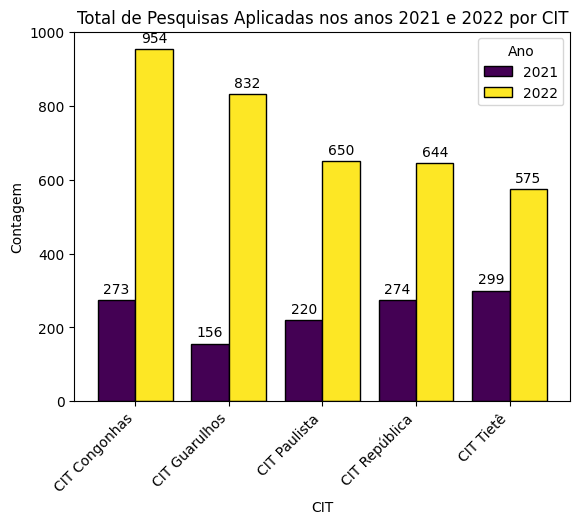

In [ ]:
# GRÁFICO DE BARRAS DO TOTAL DE PESQUISAS APLICADAS POR ANO, POR CIT.

# Converta a coluna 'Data' para o formato de data
dados['Data'] = pd.to_datetime(dados['Data'], format='%Y-%m-%d %H:%M:%S')

# Desconsiderando os zeros no final do horário
dados['Data'] = dados['Data'].dt.floor('D')

# Filtrando dados para incluir apenas 2021 e 2022
dados_filtrados = dados[(dados['Data'].dt.year == 2021) | (dados['Data'].dt.year == 2022)]

# Criando um DataFrame pivotado para ter os anos como colunas
pivotado = dados_filtrados.pivot_table(index='CIT', columns=dados_filtrados['Data'].dt.year, aggfunc='size', fill_value=0)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
ax = pivotado.plot(kind='bar', width=0.8, colormap='viridis', edgecolor='black')

# Adicionar rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black', padding=3)

plt.title('Total de Pesquisas Aplicadas nos anos 2021 e 2022 por CIT')
plt.xlabel('CIT')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.legend(title='Ano', labels=['2021', '2022'])
plt.show()



In [ ]:
# Renomear a 6ª coluna 3. País de Residência/Pais de residencia/ Country of residence para 'pais de residencia'
dados.rename(columns={dados.columns[5]: 'pais de residencia'}, inplace=True)

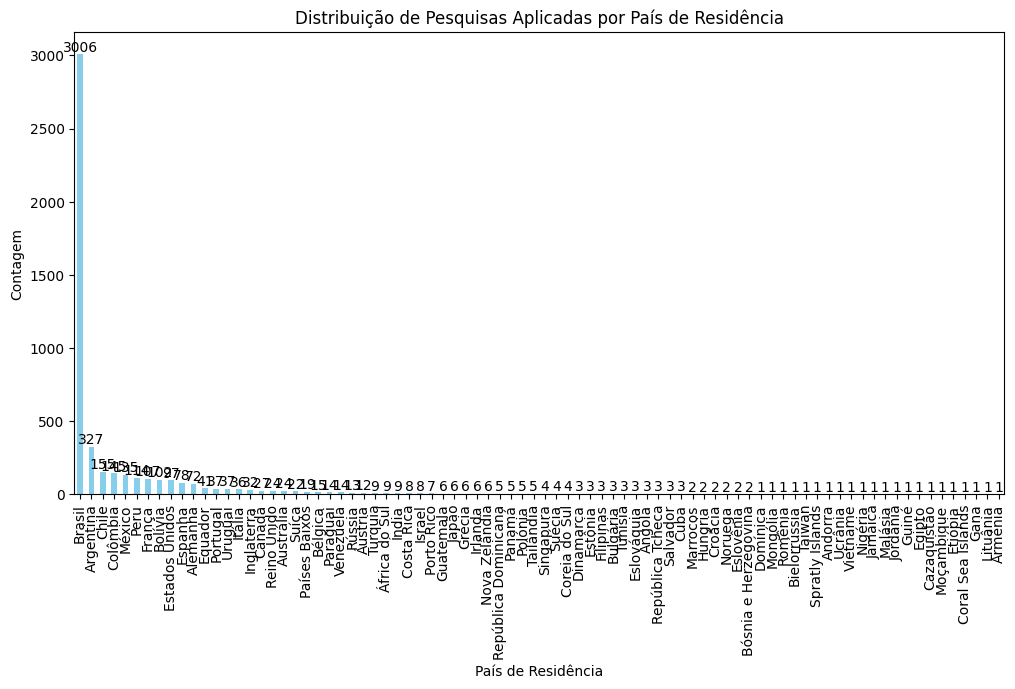

In [ ]:
# GRÁFICO DE BARRAS DO TOTAL DE PESQUISAS APLICADAS POR PAÍS DE RESIDÊNCIA.

# Contagem de valores para a variável 'pais de residencia'
contagem_paises = dados['pais de residencia'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = contagem_paises.plot(kind='bar', color='skyblue')

# Adicionar rótulos para cada barra
for i, value in enumerate(contagem_paises):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Distribuição de Pesquisas Aplicadas por País de Residência')
plt.xlabel('País de Residência')
plt.ylabel('Contagem')
plt.show()


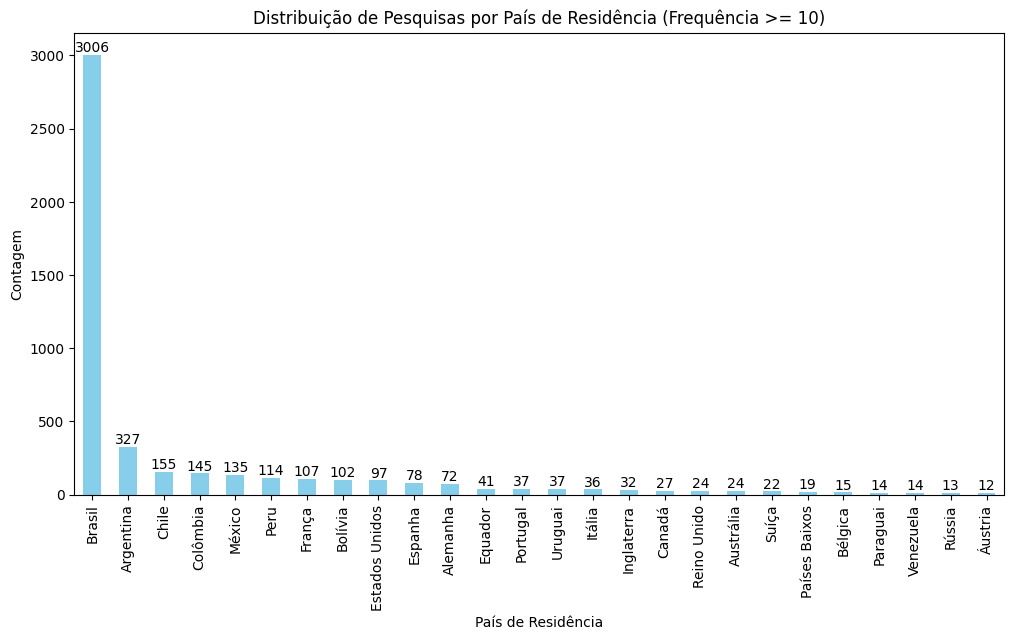

In [ ]:
# GRÁFICO DE BARRAS DO TOTAL DE PESQUISAS APLICADAS POR PAÍS DE RESIDÊNCIA, CONSIDERANDO VALORES MAIORES DO QUE 10.

# Contagem de valores para a variável 'pais de residencia'
contagem_paises = dados['pais de residencia'].value_counts()

# Filtrar para incluir apenas valores maiores ou iguais a 10
contagem_paises_filtrada = contagem_paises[contagem_paises >= 10]

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = contagem_paises_filtrada.plot(kind='bar', color='skyblue')

# Adicionar rótulos para cada barra
for i, value in enumerate(contagem_paises_filtrada):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Distribuição de Pesquisas por País de Residência (Frequência >= 10)')
plt.xlabel('País de Residência')
plt.ylabel('Contagem')
plt.show()


In [ ]:
# Renomear a 10ª coluna para '4. Estado de Residência/Provincia de Residencia/State of residence'
dados.rename(columns={dados.columns[9]: 'estado de residencia'}, inplace=True)

# Renomear a 11ª coluna para '5. Cidade de Residência/ciudad de residencia/city of residence'
dados.rename(columns={dados.columns[10]: 'cidade de residencia'}, inplace=True)

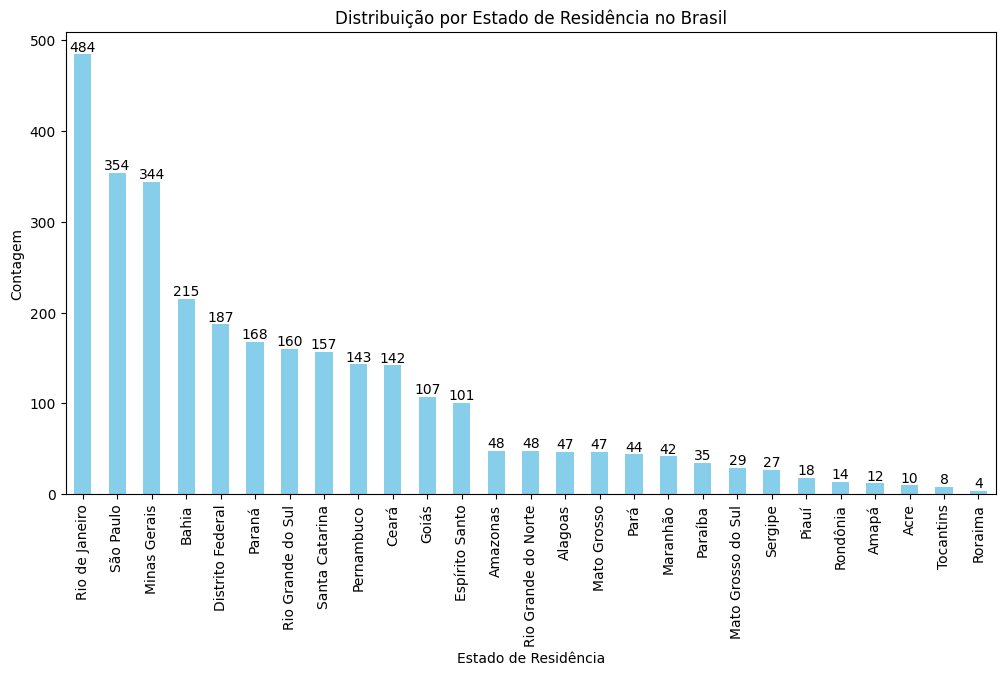

In [ ]:
# GRÁFICO DE BARRAS DO TOTAL DE PESQUISAS POR ESTADO DE RESIDÊNCIA NO BRASIL

# Filtrar o DataFrame para incluir apenas as linhas onde 'pais de residencia' é igual a 'Brasil'
dados_brasil = dados[dados['pais de residencia'] == 'Brasil']

# Contagem de valores para a variável 'estado de residencia' no subconjunto Brasil
contagem_estados = dados_brasil['estado de residencia'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = contagem_estados.plot(kind='bar', color='skyblue')

# Adicionar rótulos para cada barra
for i, value in enumerate(contagem_estados):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Distribuição por Estado de Residência no Brasil')
plt.xlabel('Estado de Residência')
plt.ylabel('Contagem')
plt.show()


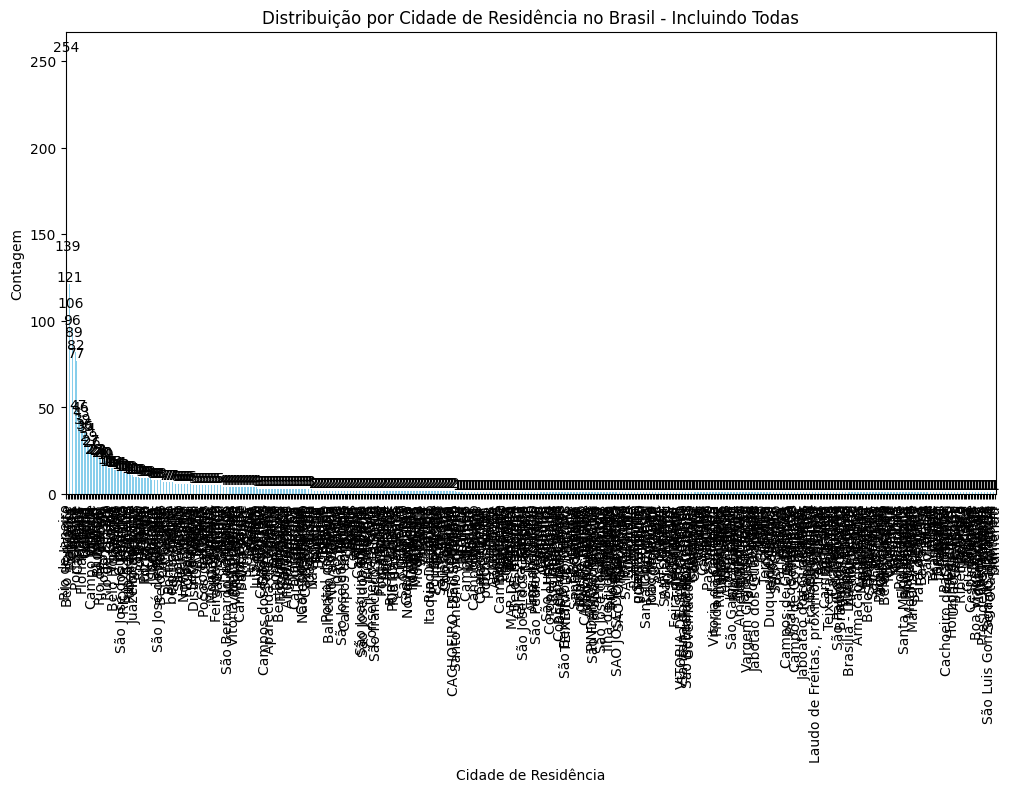

In [ ]:
# GRÁFICO DE BARRAS DO TOTAL DE PESQUISAS POR CIDADE DE RESIDÊNCIA NO BRASIL

# Filtrar o DataFrame para incluir apenas as linhas onde 'pais de residencia' é igual a 'Brasil'
dados_brasil = dados[dados['pais de residencia'] == 'Brasil']

# Contagem de valores para a variável 'cidade de residencia' no subconjunto Brasil
contagem_cidades = dados_brasil['cidade de residencia'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = contagem_cidades.plot(kind='bar', color='skyblue')

# Adicionar rótulos para cada barra
for i, value in enumerate(contagem_cidades):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Distribuição por Cidade de Residência no Brasil - Incluindo Todas')
plt.xlabel('Cidade de Residência')
plt.ylabel('Contagem')
plt.show()


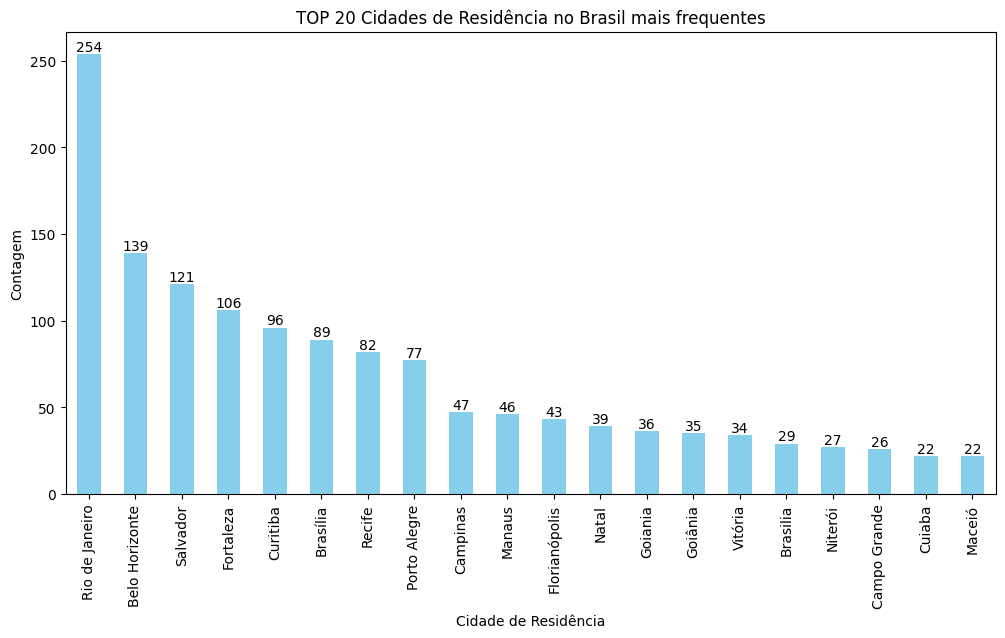

In [ ]:
# GRÁFICO DE BARRAS DO TOTAL DE PESQUISAS POR CIDADE DE RESIDÊNCIA NO BRASIL, CONSIDERANDO AS TOP 20 CIDADES.

# Filtrar o DataFrame para incluir apenas as linhas onde 'pais de residencia' é igual a 'Brasil'
dados_brasil = dados[dados['pais de residencia'] == 'Brasil']

# Contagem de valores para a variável 'cidade de residencia' no subconjunto Brasil
contagem_cidades = dados_brasil['cidade de residencia'].value_counts()

# Selecionar os 20 maiores valores
contagem_cidades_top20 = contagem_cidades.head(20)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = contagem_cidades_top20.plot(kind='bar', color='skyblue')

# Adicionar rótulos para cada barra
for i, value in enumerate(contagem_cidades_top20):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('TOP 20 Cidades de Residência no Brasil mais frequentes')
plt.xlabel('Cidade de Residência')
plt.ylabel('Contagem')
plt.show()


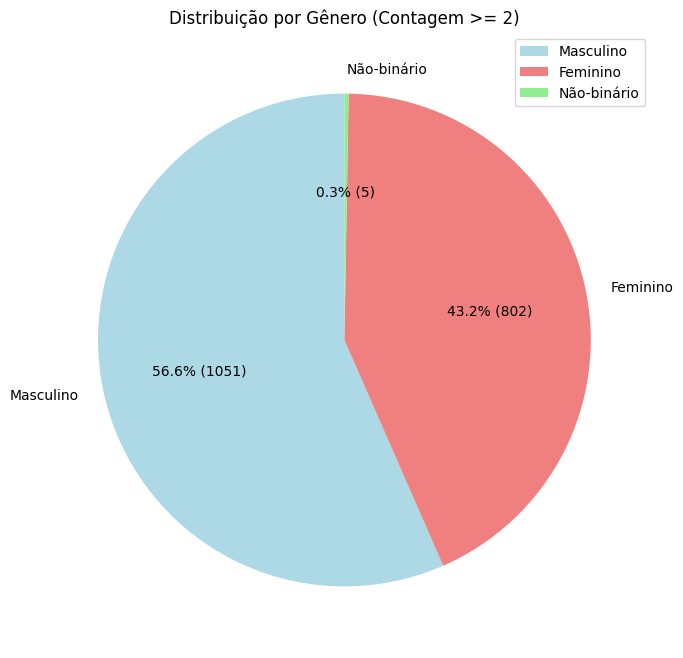

In [ ]:
# GRÁFICO DE PIZZA DA VARIÁVEL GENERO

# Renomear a 9ª coluna '6. Gênero' para 'genero'
dados.rename(columns={dados.columns[8]: 'genero'}, inplace=True)

# Criar o gráfico de pizza com valores e cores diferentes
plt.figure(figsize=(8, 8))
contagem_genero_filtrada.plot(
    kind='pie',
    autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p/100 * contagem_genero_filtrada.sum()),
    colors=cores,
    startangle=90
)

# Adicionar legenda
plt.legend(contagem_genero_filtrada.index, loc='upper right')

plt.title('Distribuição por Gênero (Contagem >= 2)')
plt.ylabel('')
plt.show()


In [ ]:
# Renomear a 13ª coluna para 'meio transporte'
dados.rename(columns={dados.columns[12]: 'meio transporte'}, inplace=True)

# Renomear a 14ª coluna para 'motivo predominante'
dados.rename(columns={dados.columns[13]: 'motivo predominante'}, inplace=True)

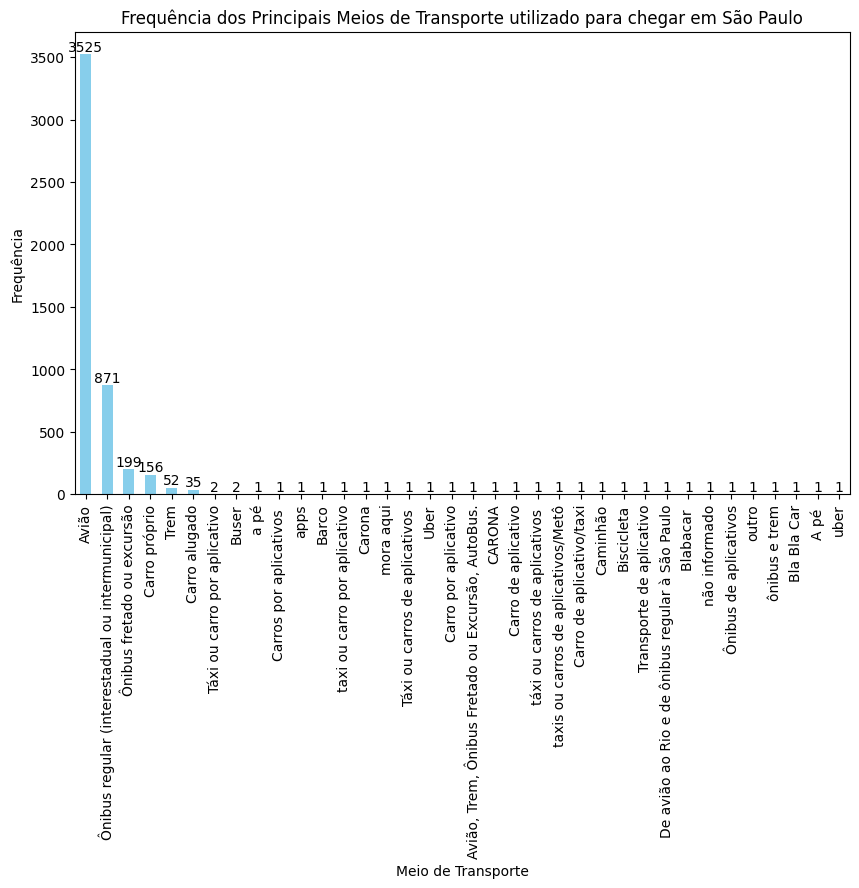

In [ ]:
# GRÁFICO DE BARRAS DA VARIÁVEL MEIO DE TRANSPORTE UTILIZADO PARA CHEGAR EM SP

# Contagem dos meios de transporte
contagem_transportes = dados['meio transporte'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = contagem_transportes.plot(kind='bar', color='skyblue')

# Adicionando rótulos aos valores nas barras
for i, v in enumerate(contagem_transportes):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Frequência dos Principais Meios de Transporte utilizado para chegar em São Paulo')
plt.xlabel('Meio de Transporte')
plt.ylabel('Frequência')
plt.show()

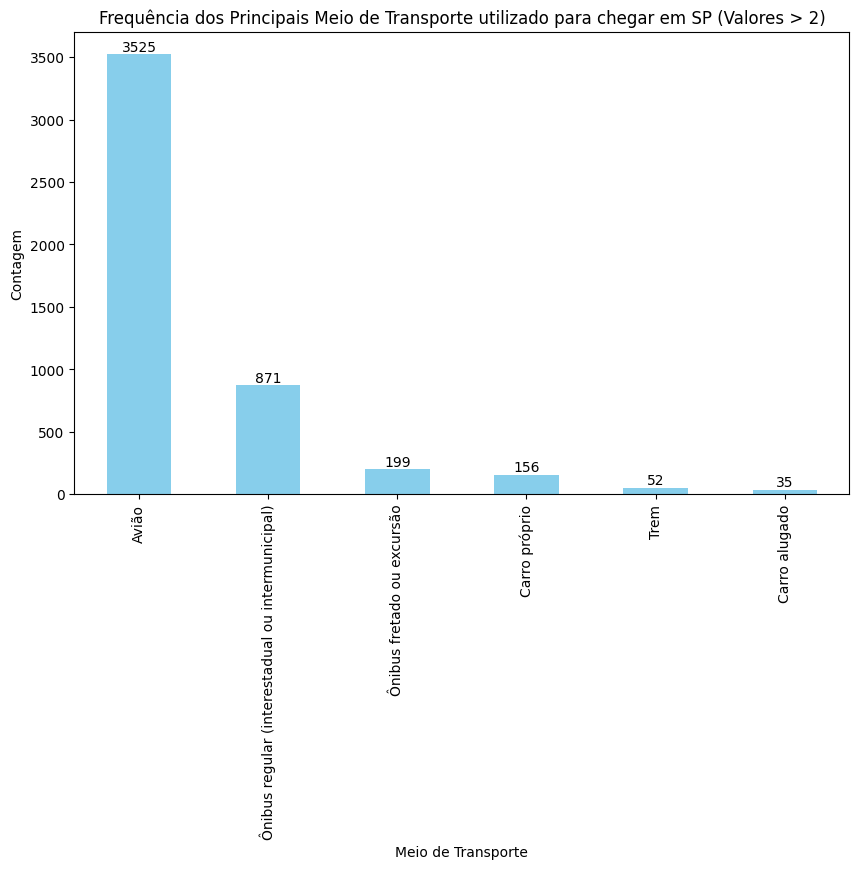

In [ ]:
# GRÁFICO DE BARRAS DA VARIÁVEL MEIO DE TRANSPORTE UTILIZADO PARA CHEGAR EM SP, CONSIDERANDO VALORES MAIORES DO QUE 2.

# Filtrar o DataFrame para incluir apenas as linhas onde a contagem de meio de transporte é maior a 2
contagem_transporte_filtrada = contagem_transporte[contagem_transporte > 2]

# Criar o gráfico de barras com os valores filtrados
plt.figure(figsize=(10, 6))
ax = contagem_transporte_filtrada.plot(kind='bar', color='skyblue')

# Adicionar rótulos para cada barra
for i, value in enumerate(contagem_transporte_filtrada):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Frequência dos Principais Meio de Transporte utilizado para chegar em SP (Valores > 2)')
plt.xlabel('Meio de Transporte')
plt.ylabel('Contagem')
plt.show()


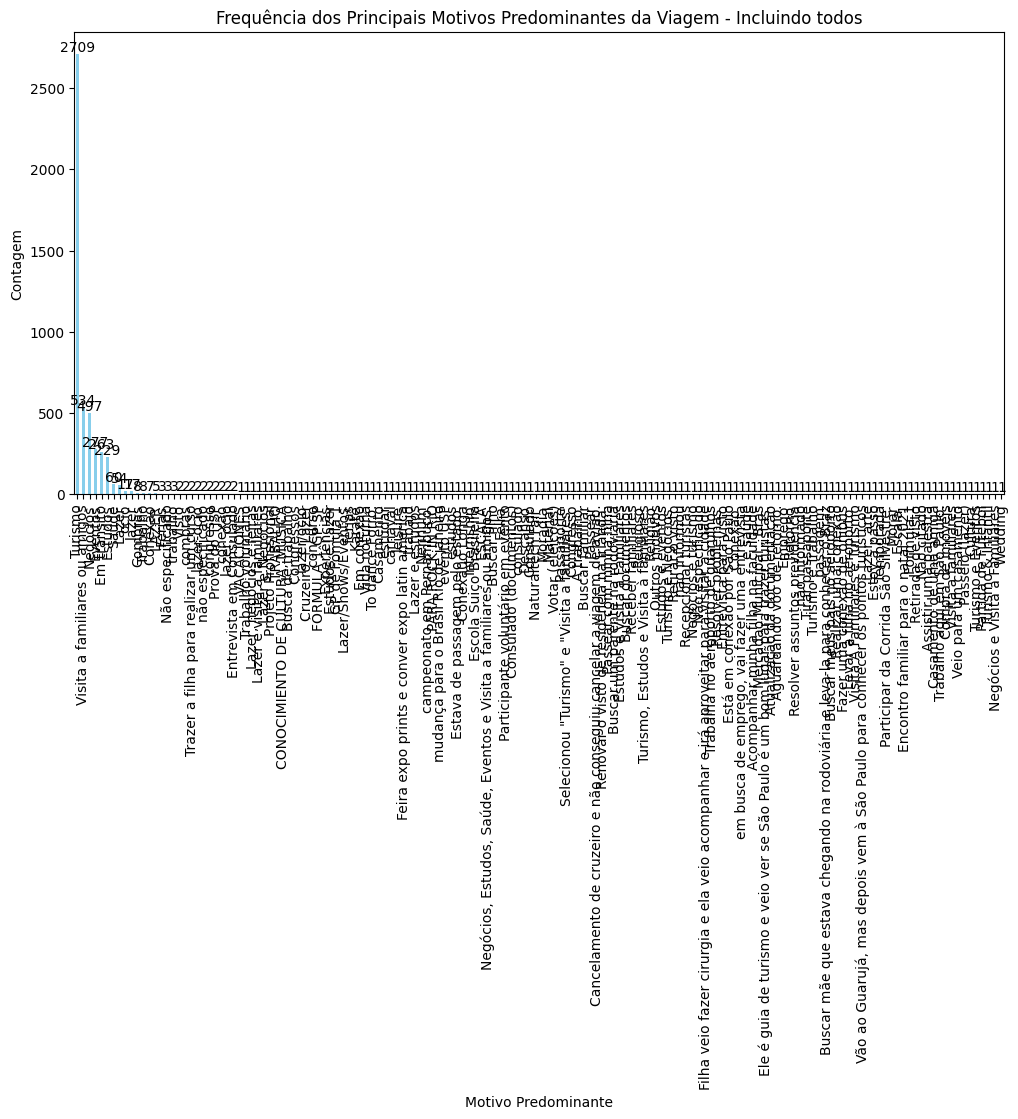

In [ ]:
# GRÁFICO DE BARRAS DO MOTIVO PREDOMINANTE DA VIAGEM A SP

# Contagem de valores para a variável 'motivo predominante'
contagem_motivo = dados['motivo predominante'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = contagem_motivo.plot(kind='bar', color='skyblue')

# Adicionar rótulos para cada barra
for i, value in enumerate(contagem_motivo):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Frequência dos Principais Motivos Predominantes da Viagem - Incluindo todos')
plt.xlabel('Motivo Predominante')
plt.ylabel('Contagem')
plt.show()


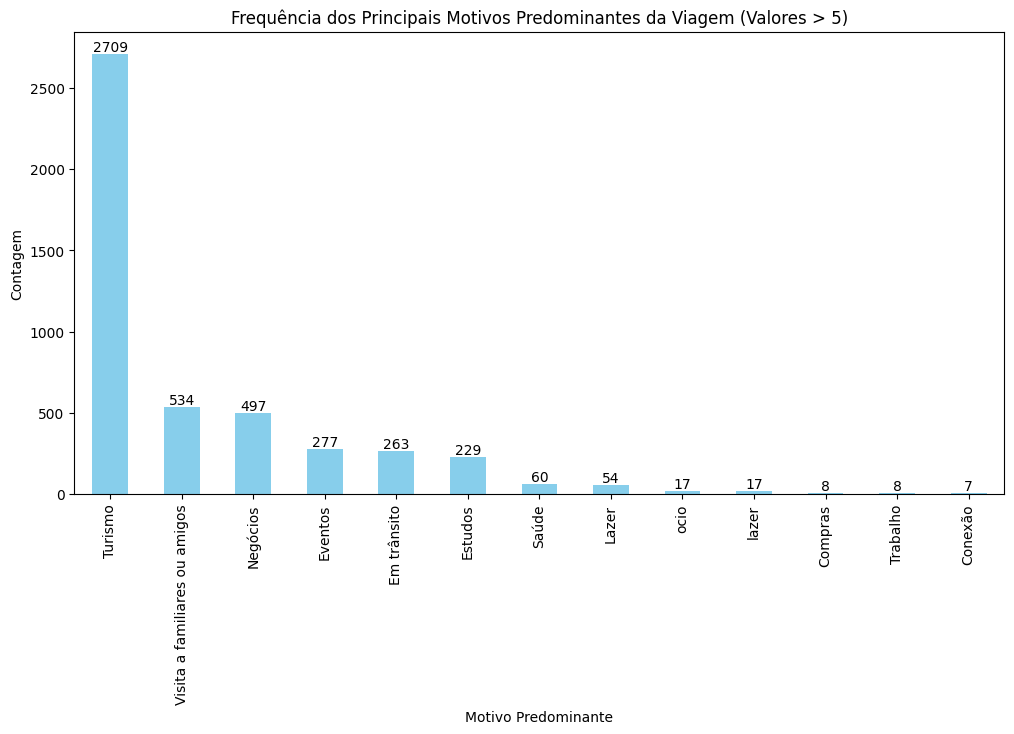

In [ ]:
# GRÁFICO DE BARRAS DO MOTIVO PREDOMINANTE DA VIAGEM A SP, CONSIDERANDO VALORES MAIOR DO QUE 5

# Filtrar o DataFrame para incluir apenas as linhas onde a contagem de motivo predominante é maior do que 5
contagem_motivo_filtrada = contagem_motivo[contagem_motivo > 5]

# Criar o gráfico de barras com os valores filtrados
plt.figure(figsize=(12, 6))
ax = contagem_motivo_filtrada.plot(kind='bar', color='skyblue')

# Adicionar rótulos para cada barra
for i, value in enumerate(contagem_motivo_filtrada):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Frequência dos Principais Motivos Predominantes da Viagem (Valores > 5)')
plt.xlabel('Motivo Predominante')
plt.ylabel('Contagem')
plt.show()


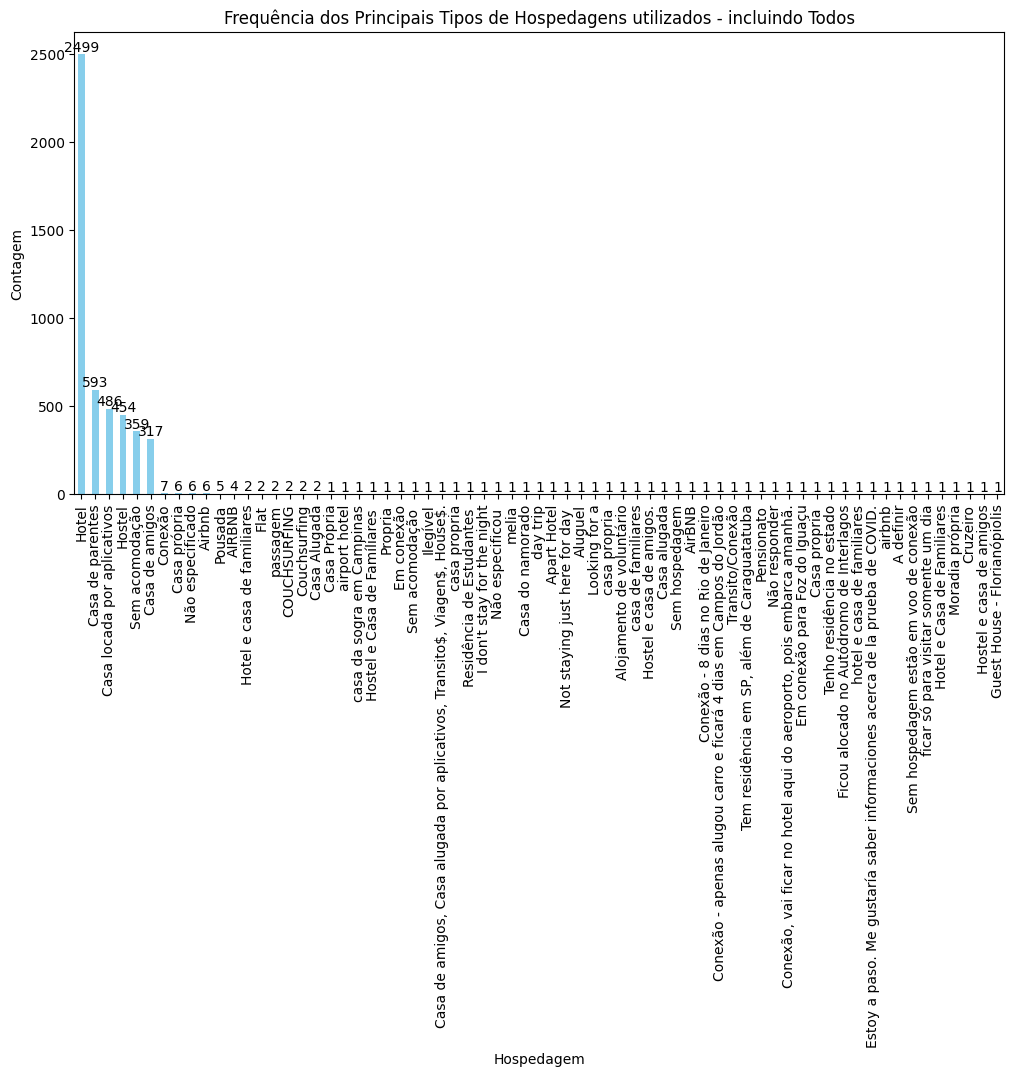

In [ ]:
# GRÁFICO DE BARRAS DO MEIO DE HOSPEDAGEM UTILIZADO EM SÃO PAULO

# Renomear a 19ª coluna para 'hospedagem'
dados.rename(columns={dados.columns[18]: 'hospedagem'}, inplace=True)

# Contagem de valores para a variável 'hospedagem'
contagem_hospedagem = dados['hospedagem'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = contagem_hospedagem.plot(kind='bar', color='skyblue')

# Adicionar rótulos para cada barra
for i, value in enumerate(contagem_hospedagem):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Frequência dos Principais Tipos de Hospedagens utilizados - incluindo Todos')
plt.xlabel('Hospedagem')
plt.ylabel('Contagem')
plt.show()


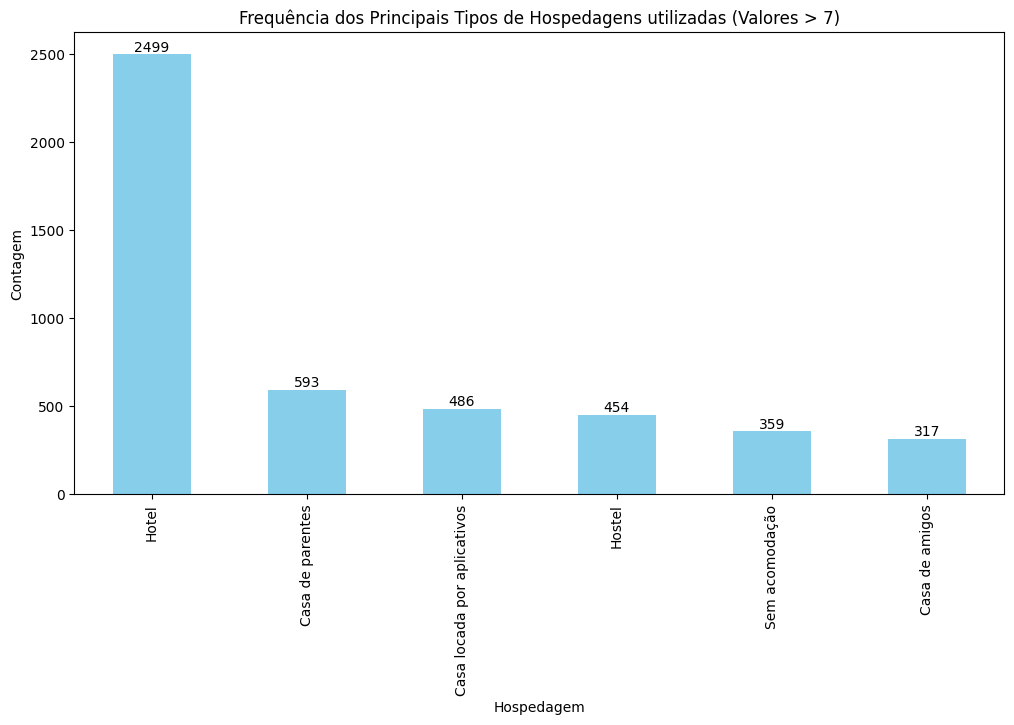

In [ ]:
# GRÁFICO DE BARRAS DO MEIO DE HOSPEDAGEM UTILIZADO EM SP, CONSIDERANDO VALORES MAIORES DO QUE 7

# Contagem de valores para a variável 'hospedagem'
contagem_hospedagem = dados['hospedagem'].value_counts()

# Filtrar o DataFrame para incluir apenas as linhas onde a contagem de hospedagem é maior do que 2
contagem_hospedagem_filtrada = contagem_hospedagem[contagem_hospedagem > 7]

# Criar o gráfico de barras com os valores filtrados
plt.figure(figsize=(12, 6))
ax = contagem_hospedagem_filtrada.plot(kind='bar', color='skyblue')

# Adicionar rótulos para cada barra
for i, value in enumerate(contagem_hospedagem_filtrada):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Frequência dos Principais Tipos de Hospedagens utilizados (Valores > 7)')
plt.xlabel('Hospedagem')
plt.ylabel('Contagem')
plt.show()


In [ ]:
# Renomear a 309ª coluna para 'avalicao atendimento'
dados.rename(columns={dados.columns[308]: 'avalicao atendimento'}, inplace=True)

# Renomear a 310ª coluna para 'avalicao servicos'
dados.rename(columns={dados.columns[309]: 'avalicao servicos'}, inplace=True)

# Renomear a 311ª coluna para 'avalicao localizacao'
dados.rename(columns={dados.columns[310]: 'avalicao localizacao'}, inplace=True)

# Renomear a 312ª coluna para 'avalicao materiais'
dados.rename(columns={dados.columns[311]: 'avalicao materiais'}, inplace=True)

# Renomear a 313ª coluna para 'comentarios'
dados.rename(columns={dados.columns[312]: 'comentarios'}, inplace=True)

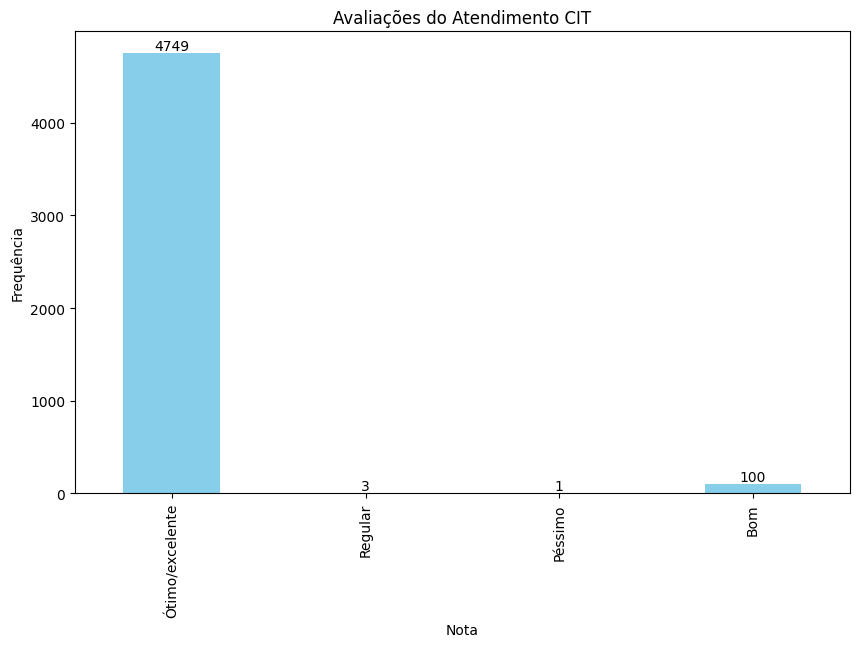

In [ ]:
# GRÁFICO BARRAS DAS AVALIAÇÕES DOS ATENDIMENTOS CITS

# Criando o gráfico de barras ordenado
plt.figure(figsize=(10, 6))
ax = dados['avalicao atendimento'].value_counts().sort_index(ascending=False).plot(kind='bar', color='skyblue')

# Adicionando rótulos aos valores nas barras
for i, v in enumerate(dados['avalicao atendimento'].value_counts().sort_index(ascending=False)):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Avaliações do Atendimento CIT')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()


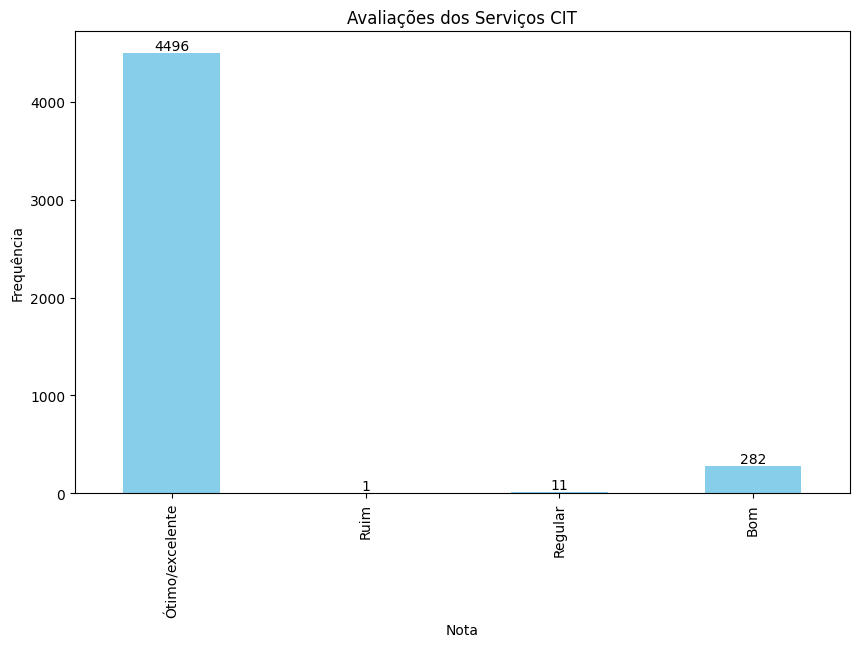

In [ ]:
# GRÁFICO BARRAS DAS AVALIAÇÕES DOS SERVIÇOS CITS

# Criando o gráfico de barras ordenado
plt.figure(figsize=(10, 6))
ax = dados['avalicao servicos'].value_counts().sort_index(ascending=False).plot(kind='bar', color='skyblue')

# Adicionando rótulos aos valores nas barras
for i, v in enumerate(dados['avalicao servicos'].value_counts().sort_index(ascending=False)):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Avaliações dos Serviços CIT')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

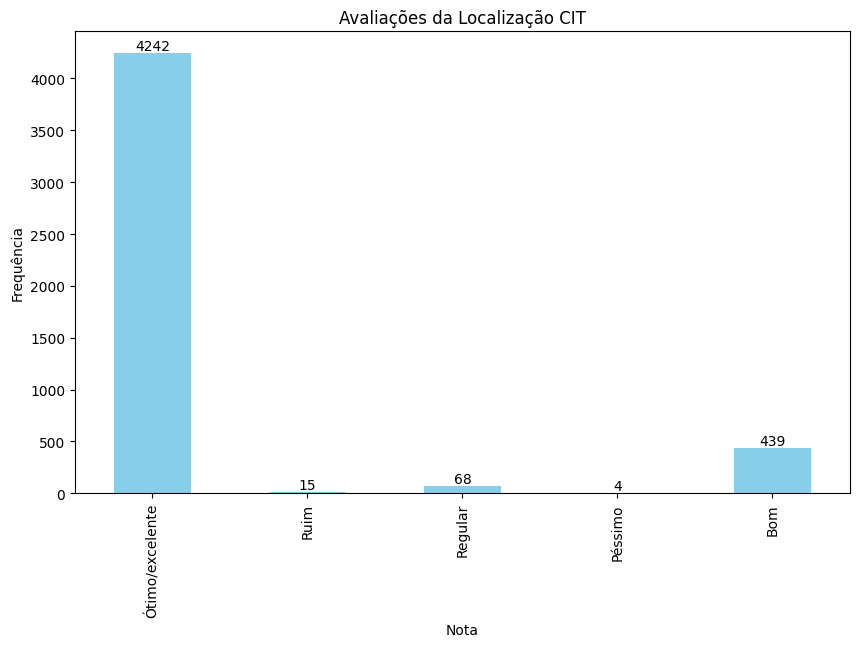

In [ ]:
# GRÁFICO BARRAS DAS AVALIAÇÕES DA LOCALIZAÇÃO CITS

# Criando o gráfico de barras ordenado
plt.figure(figsize=(10, 6))
ax = dados['avalicao localizacao'].value_counts().sort_index(ascending=False).plot(kind='bar', color='skyblue')

# Adicionando rótulos aos valores nas barras
for i, v in enumerate(dados['avalicao localizacao'].value_counts().sort_index(ascending=False)):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Avaliações da Localização CIT')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

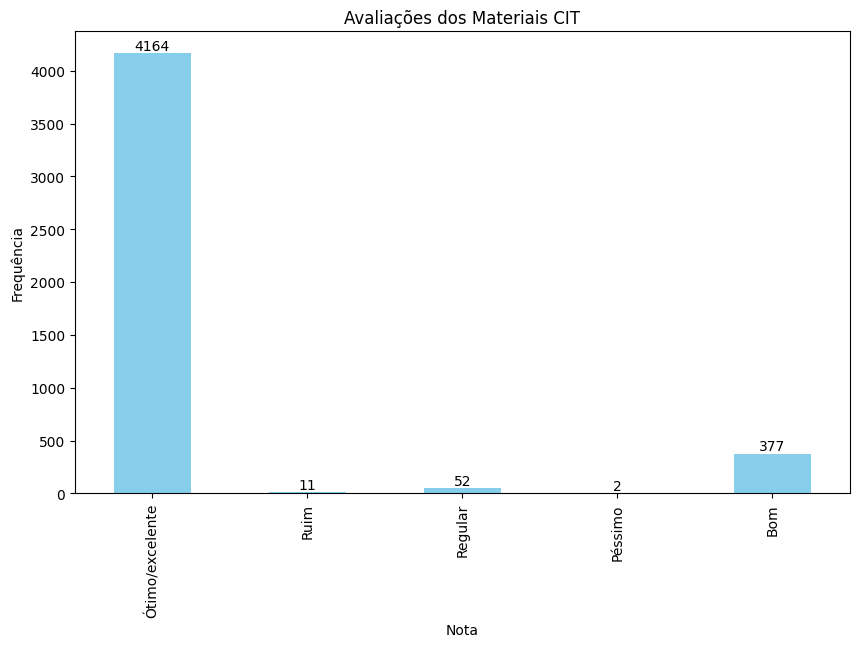

In [ ]:
# GRÁFICO BARRAS DAS AVALIAÇÕES DOS MATERIAIS CITS

# Criando o gráfico de barras ordenado
plt.figure(figsize=(10, 6))
ax = dados['avalicao materiais'].value_counts().sort_index(ascending=False).plot(kind='bar', color='skyblue')

# Adicionando rótulos aos valores nas barras
for i, v in enumerate(dados['avalicao materiais'].value_counts().sort_index(ascending=False)):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Avaliações dos Materiais CIT')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


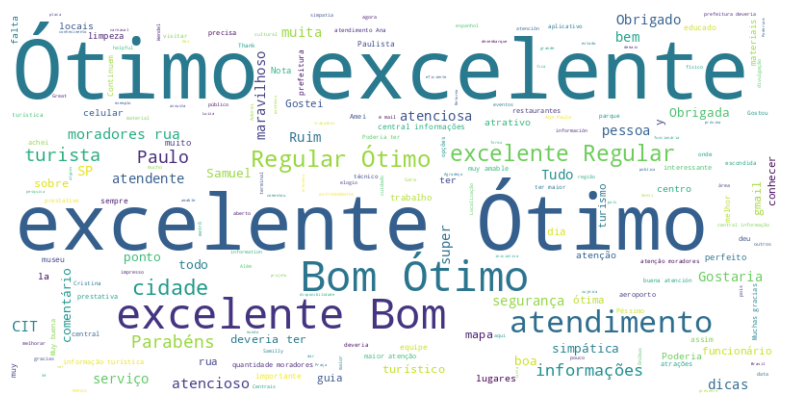

In [ ]:
#NUVEM DE PALAVRAS DA VARIÁVEL COMENTÁRIOS

import nltk

# Baixar o recurso "punkt"
nltk.download('punkt')

import nltk

# Baixar o recurso "stopwords"
nltk.download('stopwords')

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Supondo que 'dados' é o seu DataFrame e 'comentarios' é a coluna de comentários
comentarios = dados['comentarios']

# Remover valores NaN
comentarios = comentarios.dropna()

# Juntar todos os comentários em uma única string
texto_completo = ' '.join(comentarios)

# Tokenizar as palavras
palavras = word_tokenize(texto_completo)

# Remover stop words
stop_words = set(stopwords.words('portuguese'))  # Pode ser 'english' se for em inglês
palavras_sem_stop_words = [palavra for palavra in palavras if palavra.lower() not in stop_words]

# Criar uma string a partir das palavras sem stop words
texto_sem_stop_words = ' '.join(palavras_sem_stop_words)

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_sem_stop_words)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

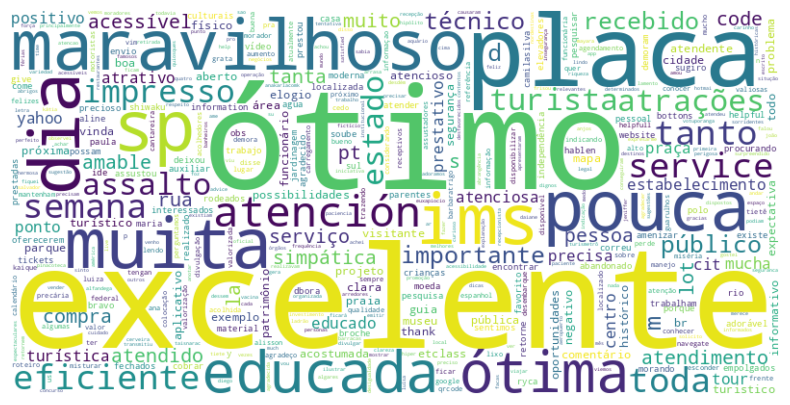

In [ ]:
# Supondo que 'dados' é o seu DataFrame e 'comentarios' é a coluna de comentários
comentarios = dados['comentarios']

# Remover valores NaN
comentarios = comentarios.dropna()

# Juntar todos os comentários em uma única string
texto_completo = ' '.join(comentarios)

# Tokenizar as palavras
palavras = word_tokenize(texto_completo)

# Remover stop words
stop_words = set(stopwords.words('portuguese'))
palavras_sem_stop_words = [palavra.lower() for palavra in palavras if palavra.lower() not in stop_words]

# Garantir que as palavras específicas apareçam apenas uma vez
palavras_unicas = set(palavras_sem_stop_words)
palavras_unicas.update(['excelente', 'ótimo', 'bom'])

# Criar uma string a partir das palavras sem stop words
texto_sem_stop_words = ' '.join(palavras_unicas)

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=len(palavras_unicas)).generate(texto_sem_stop_words)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

              Palavra  Frequência
1287  ótimo/excelente        3122
142               bom         323
10                  .         298
5                   ,         203
35                  !         190
102       atendimento         120
1288          regular          70
41                 ``          62
119         excelente          61
50                 ''          59


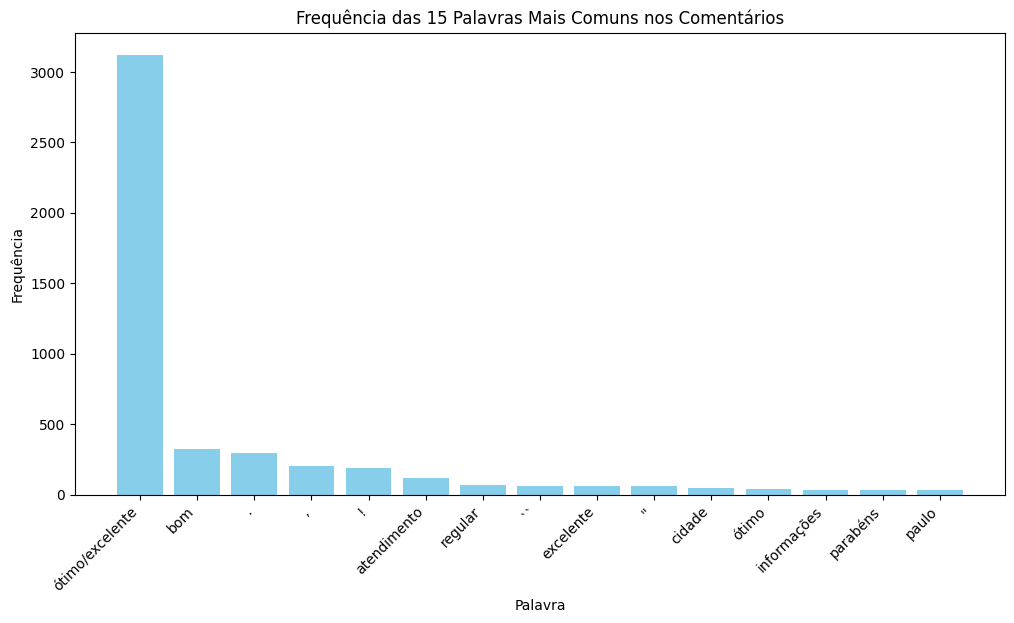

In [ ]:
from nltk.corpus import stopwords
from collections import Counter

# Supondo que 'dados' é o seu DataFrame e 'comentarios' é a coluna de comentários
comentarios = dados['comentarios']

# Remover valores NaN
comentarios = comentarios.dropna()

# Juntar todos os comentários em uma única string
texto_completo = ' '.join(comentarios)

# Tokenizar as palavras
palavras = word_tokenize(texto_completo)

# Remover stop words
stop_words = set(stopwords.words('portuguese'))
palavras_sem_stop_words = [palavra.lower() for palavra in palavras if palavra.lower() not in stop_words]

# Calcular as frequências das palavras
frequencias = Counter(palavras_sem_stop_words)

# Criar um DataFrame com as palavras e suas frequências
df_frequencias = pd.DataFrame(list(frequencias.items()), columns=['Palavra', 'Frequência'])
df_frequencias = df_frequencias.sort_values(by='Frequência', ascending=False)

# Exibir as 10 palavras mais frequentes
print(df_frequencias.head(10))

# Criar um gráfico de barras com as 15 palavras mais frequentes
plt.figure(figsize=(12, 6))
plt.bar(df_frequencias['Palavra'][:15], df_frequencias['Frequência'][:15], color='skyblue')
plt.title('Frequência das 15 Palavras Mais Comuns nos Comentários')
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

              Palavra  Frequência
1271  ótimo/excelente        3122
137               bom         323
98        atendimento         120
1272          regular          70
38                 ``          62
115         excelente          61
47                 ''          59
11             cidade          49
142             ótimo          38
183       informações          34


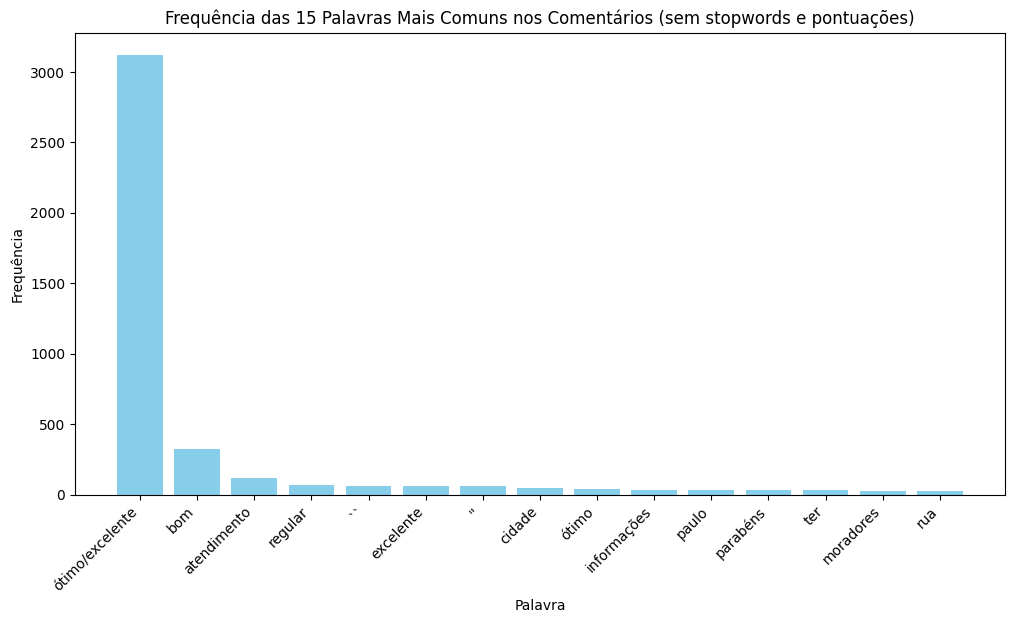

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
from collections import Counter

# Supondo que 'dados' é o seu DataFrame e 'comentarios' é a coluna de comentários
comentarios = dados['comentarios']

# Remover valores NaN
comentarios = comentarios.dropna()

# Juntar todos os comentários em uma única string
texto_completo = ' '.join(comentarios)

# Tokenizar as palavras e remover pontuações
palavras = [palavra.lower() for palavra in word_tokenize(texto_completo) if palavra.lower() not in set(punctuation)]

# Remover stop words
stop_words = set(stopwords.words('portuguese'))
palavras_sem_stop_words = [palavra for palavra in palavras if palavra not in stop_words]

# Calcular as frequências das palavras
frequencias = Counter(palavras_sem_stop_words)

# Criar um DataFrame com as palavras e suas frequências
df_frequencias = pd.DataFrame(list(frequencias.items()), columns=['Palavra', 'Frequência'])
df_frequencias = df_frequencias.sort_values(by='Frequência', ascending=False)

# Exibir as 10 palavras mais frequentes
print(df_frequencias.head(10))

# Criar um gráfico de barras com as 15 palavras mais frequentes
plt.figure(figsize=(12, 6))
plt.bar(df_frequencias['Palavra'][:15], df_frequencias['Frequência'][:15], color='skyblue')
plt.title('Frequência das 15 Palavras Mais Comuns nos Comentários (sem stopwords e pontuações)')
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

In [ ]:
print(df_frequencias)

                           Palavra  Frequência
1271               ótimo/excelente        3122
137                            bom         323
98                     atendimento         120
1272                       regular          70
38                              ``          62
115                      excelente          61
47                              ''          59
11                          cidade          49
142                          ótimo          38
183                    informações          34
24                           paulo          31
240                       parabéns          31
44                             ter          30
53                       moradores          28
64                             rua          27
101                        turista          23
43                         deveria          20
184                            cit          20
45                         atenção          20
91                             bem          19
401          

In [ ]:
#DESATIVAR LIMITE DE LINHAS E APRESENTAR EM TABELA
# Configurar para exibir todas as linhas
pd.set_option('display.max_rows', None)

# Imprimir todas as frequências de palavras, exceto aquelas com frequência 1
df_frequencias

,Palavra,Frequência
1271,ótimo/excelente,3122
137,bom,323
98,atendimento,120
1272,regular,70
38,``,62
115,excelente,61
47,'',59
11,cidade,49
142,ótimo,38
183,informações,34
